# Cleaning Piezo variables

Data Cleaning is the first step of any Data Science project and can sometimes be very time consuming.
It involves identifying and correcting errors, inconsistencies or incomplete data within a dataset.

1. Handle missing values
2. Remove duplicates/irrelevant or hard to preprocess variables
3. Clean text data with an incorrect format

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [64]:
var = "piezo_groundwater_level_category"

df_train = pd.read_csv('X_train.csv', nrows=100000)
df_test = pd.read_csv('X_test.csv', nrows=100000)

# Splitting into X and y variables
X_train = df_train.drop(var, axis=1)
y_train = df_train[var]

In [65]:
df = X_train.filter(regex='^piezo')

In [66]:
# Affichage des noms des variables
variables = df.columns.tolist()

The `.info()` function allows you to check:

1. The number of "non-null" values (number of rows without a NaN value)
2. The data type (or dtype of each column)
3. The number of rows and the columns present in the dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   piezo_station_department_code      100000 non-null  object 
 1   piezo_station_update_date          100000 non-null  object 
 2   piezo_station_investigation_depth  93886 non-null   float64
 3   piezo_station_department_name      100000 non-null  object 
 4   piezo_station_commune_code_insee   100000 non-null  object 
 5   piezo_station_pe_label             91917 non-null   object 
 6   piezo_station_bdlisa_codes         95136 non-null   object 
 7   piezo_station_altitude             100000 non-null  float64
 8   piezo_station_bss_code             100000 non-null  object 
 9   piezo_station_commune_name         100000 non-null  object 
 10  piezo_station_longitude            100000 non-null  float64
 11  piezo_station_latitude             10000

## 1. Handle missing values

Real-word data often contains missing values. This can be due to technical failures, data entry issues, incompatible data formats or even intentional omissions (for privacy concerns). Examples include a lack of response to a survey or equipment failures when collecting data.

Here is a list of strategies to handle missing values:

- Replace NaN with the mean or median value (for continuous data)
- Replace NaN with the most frequent value (for categorical data)
- Create a new category for the missing values (for categorical data)
- Use a Machine Learning model to predict the missing values (KNN, Random Forest,...)

### Selection of variables with missing values

In [68]:
# Number of missing values for each variable
missing_columns = df.columns[df.isna().sum() > 0].tolist()
print(missing_columns)

['piezo_station_investigation_depth', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name']


### Let's go

Standardization of `object-type` columns and columns names (not required here)

In [69]:
# Standardize object-type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Standardize column names to simplify their manipulation
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

/tmp/ipykernel_9203/3121806354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()
/tmp/ipykernel_9203/3121806354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)


In [71]:
# 1. Traiter les valeurs manquantes
# column_filler(df, col, 'mean')


# Removing duplicates
df.drop_duplicates(inplace=True)

/tmp/ipykernel_9203/4256957219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [74]:
def separate_col(df, list):
    categorical_variables = []
    continuous_variables = []
    for col in list:
        if df[col].dtype in ['int64', 'float64']:
            continuous_variables.append(col)

        elif df[col].dtype == 'object':
            categorical_variables.append(col)

        else:
            raise ValueError(f"Unsupported data type: {df[col].dtype}")

    return categorical_variables, continuous_variables

In [76]:
print(missing_columns)
cat_var, cont_var = separate_col(df, missing_columns)


['piezo_station_investigation_depth', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name']


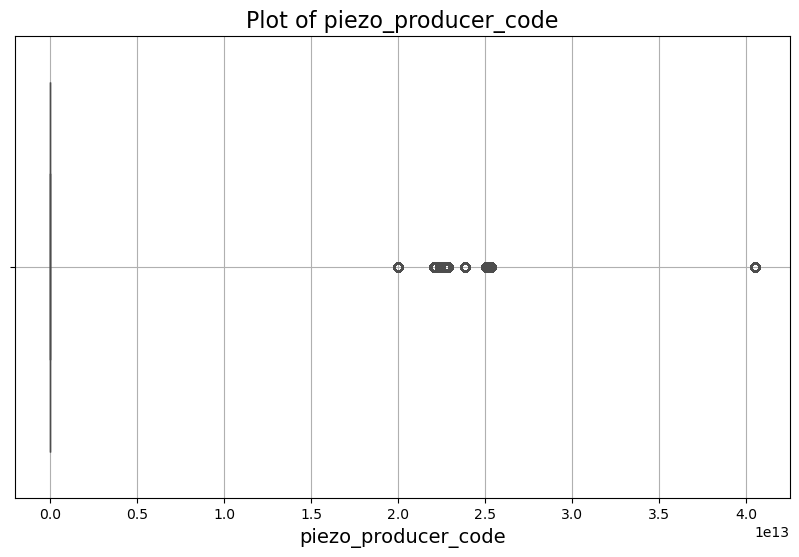

In [80]:
plot_variable(df, cont_var[1], 'box')

In [98]:
print(df['piezo_station_commune_name'].value_counts())

piezo_station_commune_name
saumur                   476
saint-martin-de-crau     410
creutzwald               372
cholet                   347
baugé-en-anjou           280
                        ... 
wavrechain-sous-faulx      1
mont-de-marsan             1
tortequesne                1
boiry-notre-dame           1
rueil-la-gadelière         1
Name: count, Length: 2194, dtype: int64
